<a href="https://colab.research.google.com/github/Thuoq/Mastering-Computer-Vision-with-TensorFlow-2.x/blob/main/Chapter_5_Neural_Network_Architecture_and_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Architecture and Models

The CNN là 1 công cụ rộng rãi trong CNN để phân biệt và detect object. 1 CNN maps và input image để ra output image hoặc một 

Trong Chương 4, Học sâu về hình ảnh, bạn đã học một số kỹ năng **code basic**để xây dựng và đào tạo mạng nơ-ron và hiểu được sự chuyển đổi trực quan của các bản đồ đối tượng trong các lớp khác nhau của mạng nơ-ron. Trong chương này, bạn sẽ hiểu sâu hơn về lý thuyết đằng sau cấu trúc và mô hình mạng nơron cũng như hiểu các khái niệm quan trọng như độ bão hòa mạng nơron theo độ sâu, vấn đề gradient **vashin**, **overfititng** do các bộ tham số lớn và nhiều khái niệm khác. Điều này sẽ giúp bạn tạo ra mô hình hiệu quả của riêng mình cho mục đích nghiên cứu của bạn và tuân theo các chủ đề của vài chương tiếp theo, nơi các lý thuyết này được áp dụng trong mã.

Chương này chúng ta coverted các architure sau 

* Alex net
* VGG 16
* Inception
* ResNet
* R-CNN
* Fast R-CNN
* Faster R-CNN
* GANs
* GNNs
* Reinforcement Learing
* Transfer Learning 

## Overview of AlexNet 
**AlexNet** đã được giới thiệu trong năm 2012 bởi Atrong paple Image Net classification. 

Đây là lần đầu tiên giới thiệu thành công mô hình CNN được tối ưu hóa để giải quyết các vấn đề về thị giác máy tính liên quan đến việc phân loại một số lượng lớn hình ảnh. Trước khi AlexNet, Các vấn đề về thị giác máy tính chủ yếu được giải quyết bằng các phương pháp học máy truyền thống, phương pháp này đã tạo ra những cải tiến gia tăng bằng cách thu thập bộ dữ liệu lớn hơn và cải thiện mô hình và kỹ thuật để giảm thiểu việc overfitting.

Kiến trúc của AlexNet trong hình dưới đây: 
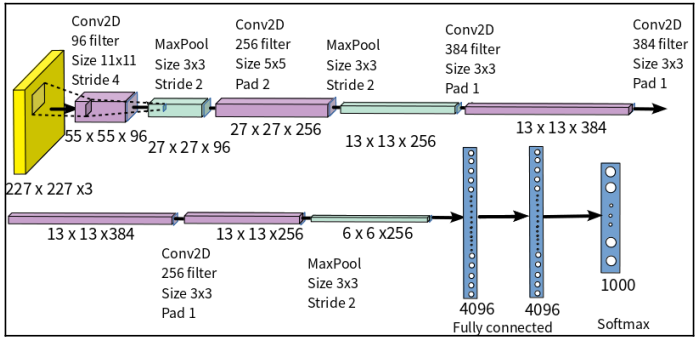

Những ý tưởng AlexNet là tổng hợp như sau 

* nó bao gồm 8 lớp đã học - 5 tích chập layer và 3 dense
* Nó sử dụng lượng lớn kernel filter - 96 filters của size (11x11) trong layer đầu tiên. 256 filters có size 5x5 trong layer tiếp theo, và 384 filters của size 3x3 trong thứ 3 và  cái thứ 4 còn cái thú 5 là 256 filters và size 3x3.
* ReLU activation layer đã được applied sau khi mỗi lần chập và dense. Nó train nhanh hơn nhiều thằng *TANH*
* Dropout regularization được sử dụng ở đầu tiên và thứ 2 trong dense
* Overfitting là giảm bởi sử dụng kỹ thuật **data-augmentation**:
> - tạo 1 random cácn ảnh 224x224 từ 256x256 hình ảnh được xử lý 
> - Thay đổi cường độ của các chanel RGB trong hình ảnh đào tạo

Code Alexnet ở dưới

In [ ]:
# Import libraries
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 # dataset
from keras.datasets import cifar10
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


1 Neurons network có rất nhiều loại parameters, rằng nó cần tối ưu, nhưng các tham số này được gọi là CONSTAINT (hằng số) vowis AlexNET

* `batch_size` là 32 số số lượng ví dụ đào tạo trên một lần chuyển tiếp hoặc chuyển tiếp.
* `num_class` là 2
* `epochs` là 100
* `data_augmentation` là True
* `num_predictions` là 20


In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation  = True
num_predictions = 20

Nào chúng ta convert input vector to into a binary class matrix nghĩa là chuyển mấy cái categorcal to 0,1 binary like one hot

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)


In [ ]:
# Init Model 
model = keras.Sequential()
## Convolution and Pooling 1
model.add(keras.layers.Conv2D(96,(11,11)
                                 ,input_shape=X_train.shape[1:]
                                 ,padding='same'
                                 ,kernel_regularizer=tf.keras.regularizers.l2()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
## Convolution and Pooling 2
model.add(keras.layers.Conv2D(256,(5,5),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
## Convolution and Pooling 3
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
## Convolution and Pooling 4
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(1024,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
## Convolution and Pooling 5
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(1024,(3,3),padding='same'))
model.add(keras.layers.BatchNormalization()),
model.add(keras.layers.Activation('relu')),
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
## Fully Connected 1
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3072))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
## Fully Connected 2 
model.add(keras.layers.Dense(4096))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
## FUll connecto 3 Output
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('softmax'))

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)


Epoch 1/100
1563/1563 [==============================] - 392s 230ms/step - loss: 2.0546 - accuracy: 0.2891
Epoch 2/100
1563/1563 [==============================] - 354s 227ms/step - loss: 1.7911 - accuracy: 0.3895
Epoch 3/100
1563/1563 [==============================] - 355s 227ms/step - loss: 1.6932 - accuracy: 0.4315
Epoch 4/100
1563/1563 [==============================] - 354s 227ms/step - loss: 1.6321 - accuracy: 0.4633
Epoch 5/100
1563/1563 [==============================] - 354s 227ms/step - loss: 1.5872 - accuracy: 0.4831
Epoch 6/100
 791/1563 [==============>...............] - ETA: 2:55 - loss: 1.5481 - accuracy: 0.5016

## Overview of VGG 16
Sau sự thành công của AlexNet trong 2012, nhiều nhiều nhà nghiên cứu đã làm việc và phát triển cấu trúc của CNN của AlexNet để phát triển accuract. **VGG16** được giới thiệu. 

và nó được kết quả là **92.7%** cấu trúc nó được thể hiện dưới hình ảnh sau đây.

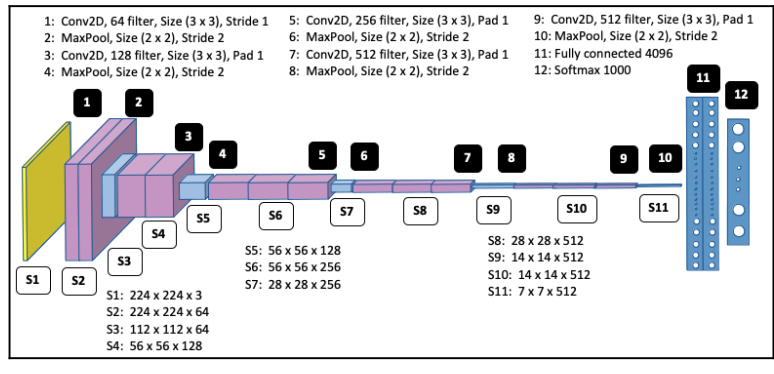

Ý tưởng cơ bnar của VGG16 được tổng hợp sau đây 

* Maximum filter size là 3x3 và minimun size là 1x1. Điều đó nghĩa là chúng có 1 filter size rất là nhỏ hơn, và số lượng cái điểm ảnh sử dụng. so với kích thước bộ lọc lớn hơn và số lượng nhỏ hơn cho AlexNet; điều này dẫn đến ít tham số hơn so với AlexNet.

* cái Stride của tích chập là 1 và padding là 1 cho convolution layer là 3x3 Maxpolling là sử lý là 2x2 và bước nhảy là 2
* Ba hàm ReLU phi tuyến được sử dụng thay vì một hàm duy nhất trong mỗi lớp, điều này làm cho hàm quyết định trở nên phân biệt hơn bằng cách giảm vấn đề gradient vashing và cho phép mạng tìm hiểu sâu. Học sâu ở đây có nghĩa là học các hình phức tạp, chẳng hạn như cạnh, đặc điểm, ranh giới, v.v.

## Overview of Inception 

Trước khi giới thiệu Inception layers, hầu hết các kiến trúc CNN đều có cấu hình tiêu chuẩn — các lớp chập, chuẩn hóa, gộp tối đa và kích hoạt xếp chồng lên nhau (theo chuỗi), theo sau là lớp softmax và được kết nối đầy đủ. Kiến trúc này dẫn đến độ sâu ngày càng tăng của mạng nơ-ron, có hai nhược điểm lớn:

* Overfitting
* Inscread Computation time
Inception model giải quyết được cả 2 vấn đề trên bởi di chuyển dense netwwork chuyển từ mạng Dense sang ma trận thưa thớt và nhóm chúng lại để tạo thành ma trận con dày đặc

Trong tờ báo Network In netwwork,  thay vì sử dụng filters tuyến tính thông thường trên hình ảnh đầu vàom tác giả đã xây dực 1 **micro neural network** và trượt nó qua hình ảnh đầu vào theo cách tương tự như CNN. Một mạng nơ-ron sâu được xây dựng bằng cách xếp chồng một số lớp này lại với nhau. The micro neural network ( được biết như là **multilayer perception**) bao gồm nhiều multiple fully connected layers với 1 activation function.  được chỉ ra trong hình ảnh dưới đây. 

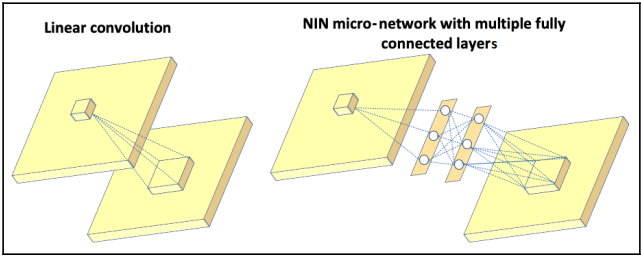

Cái bức ảnh trái chỉ ra rằng linear filter như chúng ta đã làm như CNN. Ảnh bên phải chỉ rằng **micro-network** bao gồm nhiều lớp được kết nối đầy đủ theo sau là chức năng kích hoạt kết nối hình ảnh đầu vào với lớp tiếp theo. Ý tưởng nó ở dướisau đây 

* Ý tưởng chính của **Inception architecture** là dựa trên việc tìm ra cách thức tối ưu (nhiều 1 x 1 song song) trong CNN có thể được bổ sung bằng các thành phần dày đặc sẵn có (3 x 3 và 5 x 5).Các tác giả của bài báo **Inception** đã tìm ra câu trả lời bằng cách sử dụng tích chập 1 x 1 song song với tích chập 3 x 3, 5 x 5 và một lớp gộp.Một phép chập 1 x 1 bổ sung theo sau bởi ReLU có thể được coi là tương đương với mạng vi mạng NIN. Tích chập 1 x 1 đóng vai trò như một cơ chế giảm kích thước và cũng giúp tăng chiều rộng của mạng (bằng cách xếp chúng cạnh nhau), cùng với chiều sâu của nó. Việc triển khai nhiều phức hợp với nhiều bộ lọc và gộp các lớp đồng thời song song trong cùng một lớp (lớp khởi đầu) dẫn đến lớp này là một lớp thưa thớt với chiều rộng tăng lên. Phép chập 1 x 1 ít **overfitting** do kích thước hạt nhân nhỏ hơn

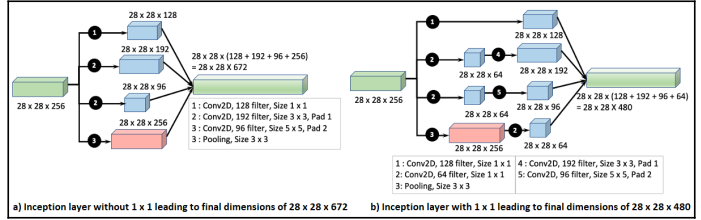

## Overview of ResNet

ResNet, sinh ra bởi vì sau khi alex net ra đời các mạng toàn tăng chiều sâu vác accuacry đc bão hoà khi cứ tăng lên như vậy. Bão hoà đây không phải là overfitting, mà là thực tế sau 1 độ sâu quan trọng đầu ra làm mất nhiều infomation của đầu vào, do đó, mối tương quan giữa đầu vào và đầu ra bắt đầu phân kỳ dẫn đến sự gia tăng độ không chính xác. như hình ở dưới đây 

![alt text](https://i1.wp.com/trituenhantao.io/wp-content/uploads/2020/04/depth-performance.png?w=708&ssl=1 "Title")

Tuy nhiên, tăng độ sâu mạng không chỉ đơn giản là xếp chồng các lớp lại với nhau. Mạng sâu rất khó huấn luyện vì vấn đề vanishing gradient – vì độ dốc được truyền ngược trở lại các lớp trước đó, phép nhân lặp đi lặp lại có thể làm cho độ dốc cực nhỏ. Kết quả là, hiệu suất của mạng bị bão hòa hoặc giảm hiệu quả nhanh chóng. 

Những các tính năng chính của ResNet chúng ta sẽ miêu ta ở dưới: 
- Vấn đề **degradation** được giải quyết bởi vấn đề **residual-learning**
- RestNet lối tắt hoặc kết nối bỏ qua, bỏ qua một hoặc nhiều lớp.
- Ánh xạ cơ bản giữa đầu vào và lớp tiếp theo là H (x).
- Lớp phi tuyến là F (x) = H (x) - x, có thể được điều chỉnh lại thành H (x) = F (x) + x, trong đó x là ánh xạ nhận dạng.
- Các kết nối lối tắt chỉ đơn giản là thực hiện ánh xạ danh tính và đầu ra của chúng được thêm vào đầu ra của các lớp xếp chồng như hình ảnh dưới đây 

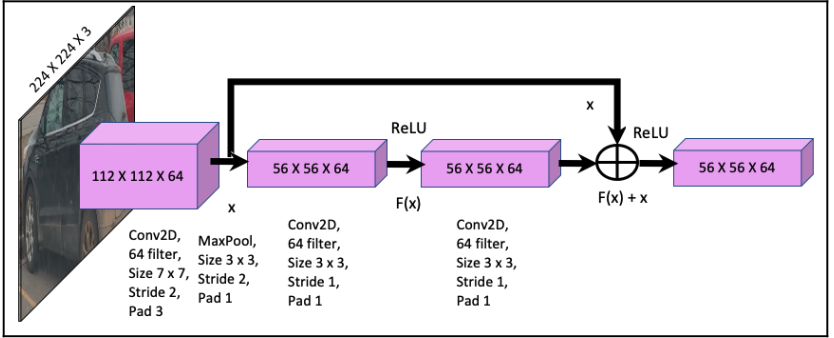

Giải thích về 1 chút của hình trên:
* The Operation **F(x) + x** được xử lý bằng Các kết nối lối tắt chỉ đơn giản là thực hiện ánh xạ danh tính và đầu ra của chúng được thêm vào đầu ra của các lớp xếp chồng
* Thêm vào những tham số  không thêm một tham số bổ sung cũng không phức tạp tính toán

## Overview of R-CNN 

**Region-specific CNN**. Đây là một thuật toán phát hiện đối tượng đơn giản và có thể mở rộng giúp cải thiện độ chính xác trung bình trung bình hơn 30% so với kết quả tốt nhất trước đó trong VOC2012. 

Toàn bộ mô hình phát hiện đối tượng được chia nhỏ thành phân đoạn hình ảnh, đề xuất vùng dựa trên tìm kiếm có chọn lọc, trích xuất tính năng bằng cách sử dụng CNN và phân loại, và hình thành hộp giới hạn sử dụng máy vectơ hỗ trợ (SVM), như thể hiện trong sơ đồ sau:

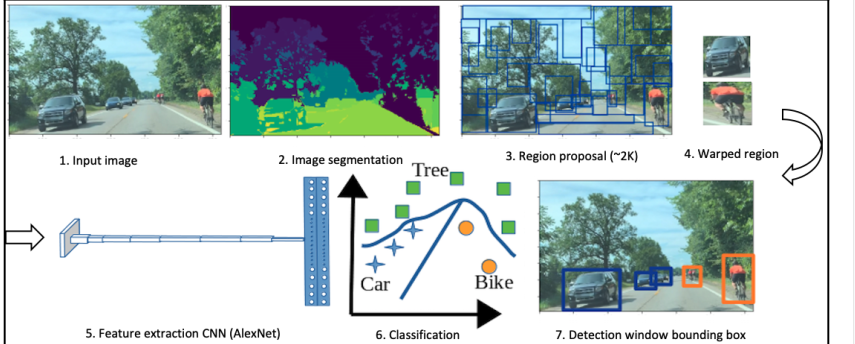

Sơ đồ trước cho thấy các bước khác nhau để chuyển đổi hình ảnh đầu vào của một chiếc ô tô và một chiếc xe đạp trên đường thành một hộp giới hạn phát hiện đối tượng.

Trong phần sau, từng bước này sẽ được mô tả chi tiết.

### Image Segmentation 

Image segmentation là đại diện của 1 hình ảnh như 1 số các vùng. Mỗi vùng trong phân đoạn hình ảnh rất có những features giống nhau như là color, text, cường độ 

#### Clutering-base segmentaion
K-means là 1 kỹ thuật học không giám sát để tách những dữ liệu tương tự thành những group dựa trên centroid. Các bước chính trong thuật toán phân cụm K có nghĩa là được trình bày như sau

- Chọn K các điểm như là vị trí bắt đầu của cụm ở vị trí bất kỳ 
- Tìm khoảng cách giữa mỗi trung tâm cụm và mỗi pixel và gán nó cho cụm gần nhất
- Cập nhật giá trị trung bình của mọi cụm.
-  Lặp lại quá trình này bằng cách thay đổi tâm cụm cho đến khi tổng khoảng cách giữa mỗi pixel và cụm liên kết của nó được thu nhỏ.

#### Graph-based segmentation

Có nhiều phương pháp phân đoạn dựa trên đồ thị có sẵn, nhưng phương pháp được mô tả ở đây cho R-CNN là phương pháp được giới thiệu bởi Pedro Felzenszwalb và Daniel Huttenlocher trong bài báo có tiêu đề **Efficient Graph-Based Image Segmentation**

Phương pháp này thường liên quan với việc biểu diễn 1 ảnh dưới dạng graph và chọn những các cạnh từ grap cái nơi mỗi pixel sẽ nối các node trong graph và connect tới các pixel lân cận bằng cạnh. Trọng số trên một cạnh thể hiện sự không giống nhau giữa các pixel. Tiêu chí phân đoạn dựa trên mức độ biến thiên của các vùng lân cận của hình ảnh được phân tách bởi một đường ranh giới. Ranh giới được xác định bằng cách đánh giá hàm ngưỡng biểu thị sự khác biệt về cường độ giữa các pixel dọc theo đường biên so với sự khác biệt về cường độ giữa các pixel lân cận. Phân đoạn được định nghĩa là thô hoặc mịn dựa trên sự hiện diện của ranh giới giữa các vùng.

#### Selective search 
Thách thức chính của phát hiện đối tượng là tìm ra vị trí chính xác của đối tượng trong hình ảnh. Rất nhiều đối tượng trong 1 hình ảnh ở các hướng không gian khác nhau làm việc khó tìm ra các ngăn các của 1 image.  Ví dụ: một đối tượng có thể được bao phủ và chỉ có thể nhìn thấy một phần như là 1 người đứng đằng sau 1 chiếc xe chúng ta có thể nhìn được các xe và ng đứng trên xe. A **Selective search** thường được sử dụng để giải quyết vấn đề này, nó chia ra tất cả các hình ảnh thành nhiều các mảnh thành nhiều vùng phân đoạn. Và nó sử dụng bottom-up approach để gộp các vùng giống nhau thành 1 vùng lớn hơn

và Nó sẽ giải thích cách nó search ở phía dưới: 


1. Lúc đầu, hai vùng giống nhau nhất được đánh giá và nhóm lại với nhau.
2. Tiếp theo, các điểm tương đồng mới được tính toán giữa vùng kết quả và một vùng mới để tạo thành một nhóm mới.
3. Quá trình nhóm các vùng giống nhau nhất được lặp lại cho đến khi vùng đó bao phủ toàn bộ hình ảnh.

#### Region proposal

#### Feature Extraction

Feature extraction là nhóm các feature giống nhau, như cạnh, góc, đường thẳng thành 1 feature vector. Feature vector đó sẽ giảm chiều của image từ 227x227 thành thành 4086.

####  Classification of the Image 


#### Bounding box regressiong 

### Overview of Fast R-CNN